In [1]:
import pandas as pd 

returns = pd.read_csv("data/processed/dataset_returns.csv", index_col=0)
log_returns = pd.read_csv("data/processed/dataset_log_returns.csv", index_col=0)

# Remove the first line with NaN
returns = returns.dropna(how='all')
log_returns = log_returns.dropna(how='all')
log_returns

,A,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.018915,-0.028576,-0.018998,0.000223,-0.006002,-0.017029,-0.004989,-0.018353,-0.035215,-0.000720,...,-0.007209,0.000000,-0.017166,-0.011416,-0.027743,-0.064258,-0.020527,0.036625,-0.014177,-0.006021
2015-01-06,-0.015701,0.000094,-0.004962,-0.011421,0.002233,-0.007239,-0.020350,-0.023753,-0.019910,-0.008325,...,-0.004986,-0.001108,-0.021562,0.005306,-0.005330,-0.005898,-0.012350,-0.008513,-0.007231,-0.009804
2015-01-07,0.013185,0.013925,0.039621,0.008075,0.005818,0.020772,0.008190,0.010462,0.014920,0.008686,...,0.014213,0.003045,0.028945,0.008598,0.010082,0.007856,0.032601,0.024566,0.025146,0.020432
2015-01-08,0.029535,0.037702,0.010404,0.020346,0.017254,0.015134,0.025135,0.017501,-0.014716,0.022681,...,0.011360,0.010722,0.011959,0.011532,0.016507,0.007518,0.017270,0.010561,0.021134,0.015282
2015-01-09,-0.007364,0.001072,-0.027736,-0.010563,-0.008759,-0.001113,-0.014922,-0.000731,-0.008567,-0.007188,...,-0.008899,-0.001368,0.012422,-0.012361,-0.001410,-0.019043,-0.001768,-0.014529,0.014508,0.001583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011083,0.011413,0.008985,0.003929,0.006278,0.007940,0.002683,0.014782,0.004355,0.007822,...,0.005235,0.006390,0.007575,0.007210,0.000940,0.005432,0.008480,0.004484,0.012187,0.002553
2024-12-26,-0.001986,0.003171,-0.004454,0.004434,0.002802,-0.003324,0.004944,-0.000138,-0.000395,0.002594,...,0.005805,-0.003190,0.005952,-0.000440,0.000845,0.002705,0.007380,-0.000466,0.003559,0.004966
2024-12-27,-0.002137,-0.013331,-0.006663,-0.002432,-0.006369,-0.011862,-0.008208,-0.004919,-0.000593,-0.003539,...,-0.004920,-0.006410,-0.007079,-0.000587,-0.000094,-0.007966,-0.005678,-0.003549,-0.019799,-0.005574


In [2]:
all_returns = []

for col in returns.columns:
    all_returns.extend(returns[col].values)

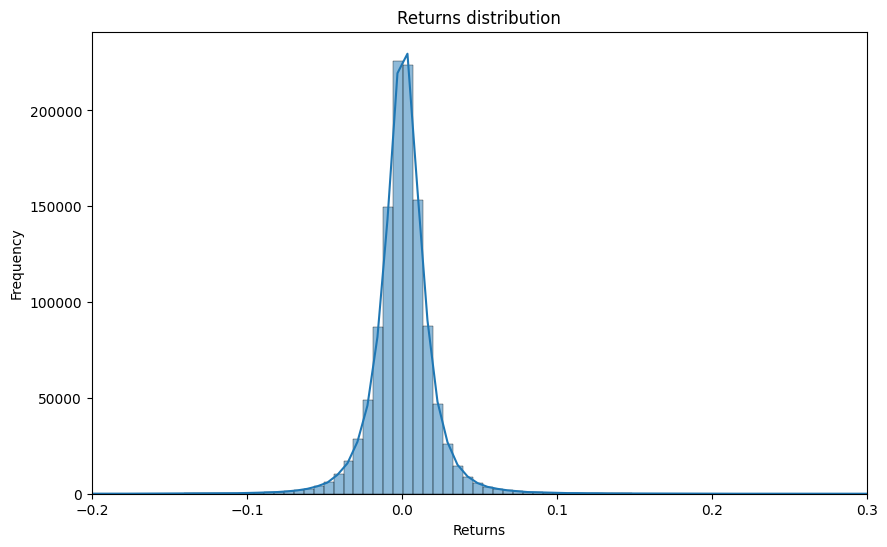

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=all_returns, bins=200, kde=True)
plt.title("Returns distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.xlim(-0.2, 0.3)  # Zoom sur la plage -0.2 à 0.3
plt.show()

In [4]:
from src.utils.data_explo_func import detect_splits_from_returns, detect_splits_from_log_returns, summarize_events

events_simple = detect_splits_from_returns(returns, tol=0.05)
display(events_simple.head())
print(summarize_events(events_simple))

,ticker,date,observed_value,matched_split,space,rel_error
0,OXY,2020-03-09,-0.520138,2-for-1,simple_return,0.040276
1,PCG,2019-01-14,-0.523593,2-for-1,simple_return,0.047186


  ticker  n_events
0    OXY         1
1    PCG         1


In [5]:
events_log = detect_splits_from_log_returns(log_returns, tol=0.08)
display(events_log.head())
print(summarize_events(events_log))

,ticker,date,observed_value,matched_split,space,rel_error
1,PCG,2019-01-14,-0.741483,2-for-1,log_return,0.069733
0,OXY,2020-03-09,-0.734257,2-for-1,log_return,0.059309


  ticker  n_events
0    OXY         1
1    PCG         1


After checking, it’s not a stock split — it’s just a macroeconomic event. I was afraid beacause I scrapped the data from Yahoo Finance but with the new version, there is no more the "Ajd Close" column.

# PCA Analysis

In [6]:
from src.utils.data_explo_func import import_sector_data, make_pca_analysis, perform_pca, analyze_pca_results

sectors = pd.read_csv("data/raw/tickers_sectors.csv", index_col=0)
sector_list = sectors.Sector.unique().tolist()
print(sector_list)

sector_returns, sector_log_returns = import_sector_data("Information Technology")
sector_returns

['Health Care', 'Information Technology', 'Financials', 'Consumer Staples', 'Industrials', 'Utilities', 'Materials', 'Real Estate', 'Consumer Discretionary', 'Energy', 'Communication Services', 'unknown']


,AAPL,ACN,ADBE,ADI,ADSK,AKAM,AMAT,AMD,ANET,APH,...,TDY,TEL,TER,TRMB,TXN,TYL,VRSN,WDAY,WDC,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.028172,-0.016884,-0.004976,-0.018185,-0.014614,-0.020711,-0.032051,-0.003745,0.017869,-0.018270,...,-0.023884,-0.019471,-0.018782,-0.032702,-0.015520,-0.017432,-0.016611,-0.004975,-0.013221,-0.014077
2015-01-06,0.000094,-0.007213,-0.020145,-0.023473,-0.019775,-0.020504,-0.037666,-0.011278,0.000157,-0.012723,...,-0.017048,-0.012109,-0.030523,-0.014214,-0.016524,-0.010003,-0.018848,-0.007374,-0.022300,-0.007205
2015-01-07,0.014023,0.020990,0.008223,0.010517,-0.002087,-0.008406,0.009462,-0.019011,0.020843,0.017119,...,0.007856,0.030070,0.008004,-0.012471,0.017961,0.010676,0.008336,-0.000881,0.015018,0.025465
2015-01-08,0.038422,0.015249,0.025453,0.017655,0.024747,0.023437,0.031956,0.011628,0.015045,0.019478,...,0.016702,0.020149,0.031234,0.013023,0.016316,0.029897,0.022286,0.043226,0.020714,0.021359
2015-01-09,0.001072,-0.001113,-0.014811,-0.000730,-0.009014,-0.012831,0.000826,0.007663,0.004537,-0.005750,...,-0.004480,-0.005910,-0.003080,-0.001948,0.000560,-0.015659,0.008087,-0.002174,0.016670,0.014613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011478,0.007972,0.002686,0.014891,0.012572,0.003209,0.005434,0.013563,0.013794,0.009438,...,0.010445,0.009645,0.011598,0.009836,0.012096,0.008176,0.007601,0.013753,0.002274,0.012262
2024-12-26,0.003176,-0.003318,0.004956,-0.000138,-0.003154,0.010835,-0.004870,-0.009740,0.001832,-0.001396,...,0.003284,0.005498,0.006771,0.005983,-0.003690,-0.010713,0.006204,0.001264,0.000162,0.003566
2024-12-27,-0.013242,-0.011792,-0.008175,-0.004907,-0.008958,-0.010106,-0.004297,0.001040,-0.015932,-0.011459,...,-0.010764,-0.009023,-0.017579,-0.015214,-0.002869,-0.009682,0.006018,-0.011656,-0.016367,-0.019604


In [7]:
for sector in sector_list:
    sector_returns, sector_log_returns = import_sector_data(sector)
    print(sector, sector_returns.shape[1])

Health Care 57
Information Technology 62
Financials 70
Consumer Staples 34
Industrials 69
Utilities 29
Materials 24
Real Estate 29
Consumer Discretionary 49
Energy 21
Communication Services 20
unknown 1


In [8]:
# Perform a PCA on the entire dataset

pca, transformed_data, explained_variance_ratio = perform_pca(returns, n_components=3)

pc_df = analyze_pca_results(pca, transformed_data, explained_variance_ratio, returns)
display(pc_df)

Shape of transformed data: (2515, 3)

Explained variance ratio:
PC1: 0.3669 (36.69%)
PC2: 0.0520 (5.20%)
PC3: 0.0400 (4.00%)

Cumulative variance explained: 45.89%


,PC1,PC2,PC3
Date,,,
2015-01-05,-19.459224,3.228962,2.281714
2015-01-06,-10.939619,5.010986,-2.171313
2015-01-07,13.712326,5.211893,1.303345
2015-01-08,19.914333,0.026449,2.013023
2015-01-09,-9.921041,-1.036482,1.149185
...,...,...,...
2024-12-24,8.326300,-0.036574,0.522069
2024-12-26,0.599068,-0.153602,-0.501927
2024-12-27,-8.516218,0.573739,-1.609549


In [9]:
for sector in sector_list:
    if sector != 'unknown':
        print(sector)
        make_pca_analysis(sector)
        print("------------------------------")

Health Care
Shape of transformed data: (2515, 3)

Explained variance ratio:
PC1: 0.3833 (38.33%)
PC2: 0.0588 (5.88%)
PC3: 0.0421 (4.21%)

Cumulative variance explained: 48.42%
------------------------------
Information Technology
Shape of transformed data: (2515, 3)

Explained variance ratio:
PC1: 0.4740 (47.40%)
PC2: 0.0453 (4.53%)
PC3: 0.0337 (3.37%)

Cumulative variance explained: 55.30%
------------------------------
Financials
Shape of transformed data: (2515, 3)

Explained variance ratio:
PC1: 0.5587 (55.87%)
PC2: 0.0640 (6.40%)
PC3: 0.0410 (4.10%)

Cumulative variance explained: 66.37%
------------------------------
Consumer Staples
Shape of transformed data: (2515, 3)

Explained variance ratio:
PC1: 0.3752 (37.52%)
PC2: 0.0705 (7.05%)
PC3: 0.0534 (5.34%)

Cumulative variance explained: 49.91%
------------------------------
Industrials
Shape of transformed data: (2515, 3)

Explained variance ratio:
PC1: 0.4856 (48.56%)
PC2: 0.0402 (4.02%)
PC3: 0.0349 (3.49%)

Cumulative variance

In [10]:
from src.utils.data_explo_func import get_variance_by_sector

# Display results
display(get_variance_by_sector(sector_list))

,Sector,PC1 (%),PC2 (%),PC3 (%),Total (%)
5,Utilities,68.09,5.07,3.29,76.46
9,Energy,62.90,5.80,5.37,74.06
7,Real Estate,59.01,8.75,4.50,72.26
2,Financials,55.87,6.40,4.10,66.37
6,Materials,45.92,6.55,4.84,57.31
4,Industrials,48.56,4.02,3.49,56.07
1,Information Technology,47.40,4.53,3.37,55.30
10,Communication Services,37.86,10.07,6.88,54.81
8,Consumer Discretionary,42.01,6.43,3.48,51.91
3,Consumer Staples,37.52,7.05,5.34,49.91


# Let's try to substract the risk free rate from the returns

# 